In [44]:
#importing the right libaries for machine learning 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#importing the dataset
df = pd.read_csv('Hinsurance.csv')
df.shape

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *



In [45]:
df.head(5) #showing the first 5 samples from the dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [46]:
#converting categorical values to numeric values

#converting gender values
sex2 =  pd.get_dummies(df["sex"],drop_first=True)
df = pd.concat([df, sex2], axis = 1)
del df['sex']


#converting smoker values
smoker =  pd.get_dummies(df["smoker"],drop_first=True)
df = pd.concat([df, smoker], axis = 1)
df = df.rename({"yes" : "does_smoke"}, axis=1)
del df['smoker']

#converting region values
smoker =  pd.get_dummies(df["region"],drop_first=False)
df = pd.concat([df, smoker], axis = 1)
df = df.rename({"northeast" : "region_northeast"}, axis=1)
df = df.rename({"northwest" : "region_northwest"}, axis=1)
df = df.rename({"southwest" : "region_southwest"}, axis=1)
df = df.rename({"southeast" : "region_southeast"}, axis=1)
del df['region']

#reordering column so the smoker column is the last column
df = df[['age', 'bmi', 'children', 'expenses', 'male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'does_smoke']]


In [47]:
df.head().isnull().sum().sum() #checking for null values in the dataset

0

In [48]:
#data analysis

In [49]:
df.columns #displaying all columns in the dataset

Index(['age', 'bmi', 'children', 'expenses', 'male', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'does_smoke'],
      dtype='object')

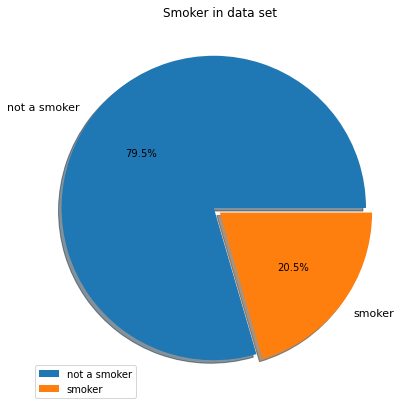

In [50]:
#creating smoker pie chart
counts = df.does_smoke.value_counts() 
plt.figure(figsize=(7,7))
plt.pie(counts, explode = (0.05, 0), autopct='%1.1f%%',
        labels=['not a smoker','smoker'], shadow=True)
plt.title('Smoker in data set')
# Set label for x-axis 

plt.legend(fontsize=10) # using a size in points
plt.show()


Text(0, 0.5, 'Count')

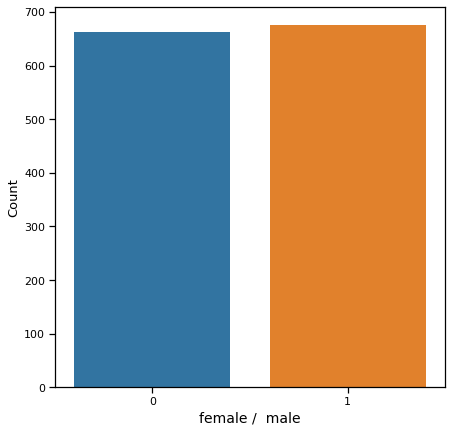

In [51]:
#gender disturbution in the dataset
plt.figure(figsize=(7,7))

sns.countplot(x ='male', data = df) 
plt.xlabel('female /  male',fontsize=14)
plt.ylabel('Count', fontsize=13)


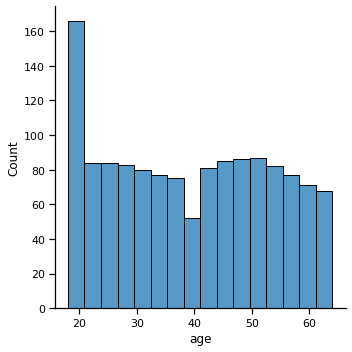

In [52]:
#age distrubtion 
sns.displot(df, x="age", bins=16)

<Figure size 720x720 with 0 Axes>

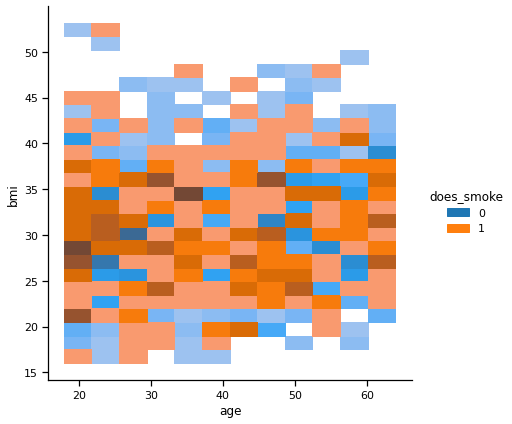

In [53]:
#heatmap to show where the smokers are situated in the dataset in terms of bmi and age
plt.figure(figsize=(10,10))
sns.displot(df, x = "age", y = "bmi",  hue = "does_smoke", height=6, common_norm = False)
sns.set_context("notebook")



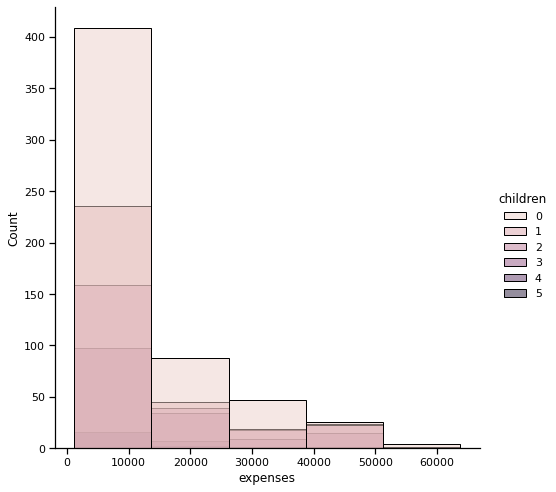

In [54]:
sns.color_palette("tab10")

sns.displot(df, x="expenses", height= 7, bins=5, hue=df['children'])


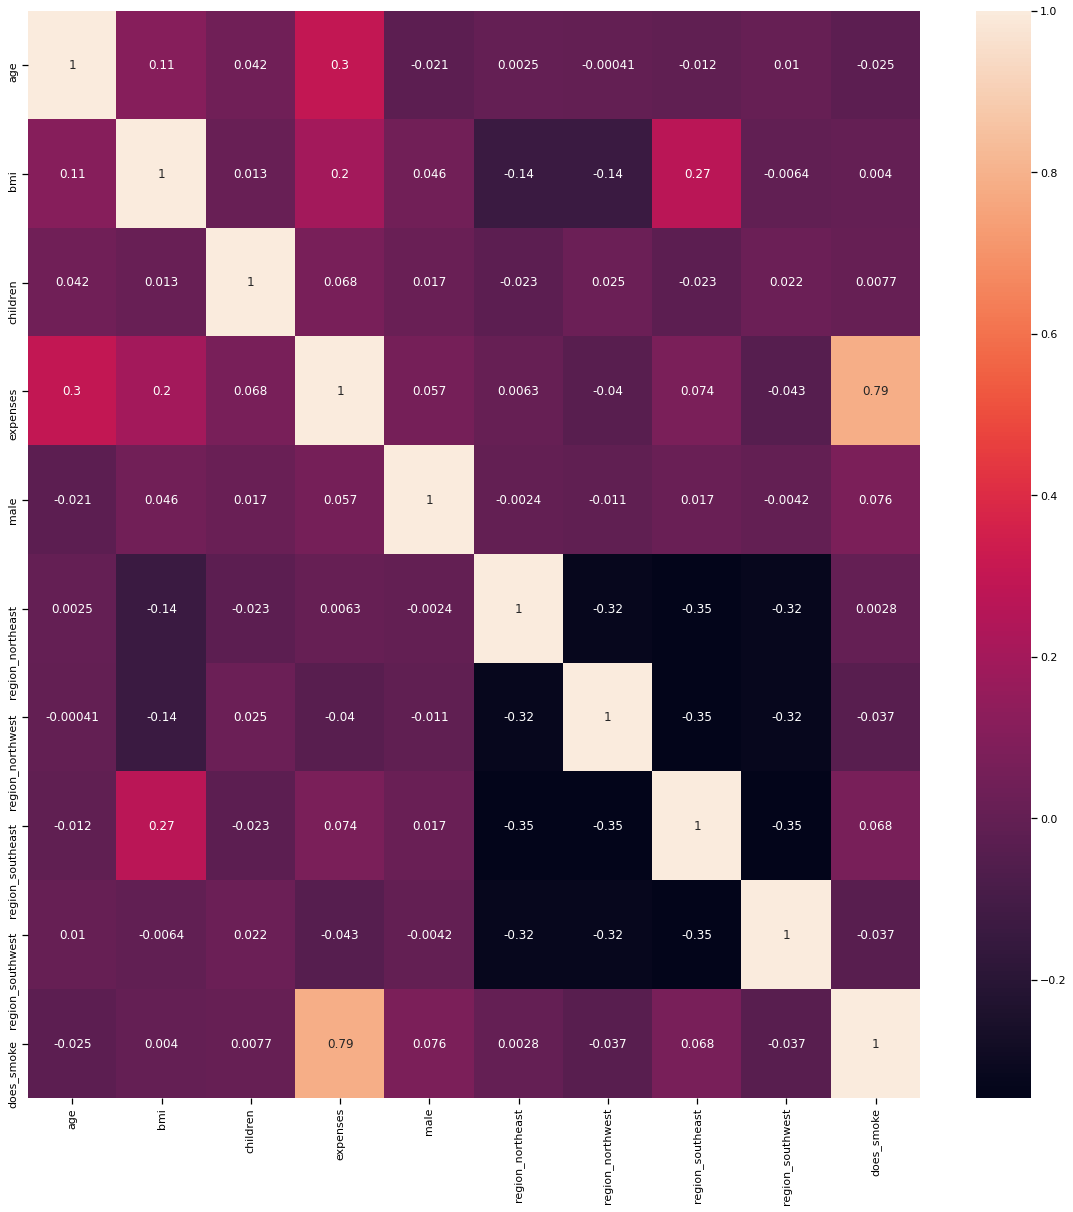

In [55]:
#correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
   #Correlation matrix containing all the features within the dataset
sns.heatmap(correlation_matrix, annot=True)
plt.show()

test score Accuracy 94.28%
train score Accuracy 92.20%
Cross Validation Score: 92.78%
Classifcation report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       318
           1       0.89      0.83      0.86        84

    accuracy                           0.94       402
   macro avg       0.92      0.90      0.91       402
weighted avg       0.94      0.94      0.94       402



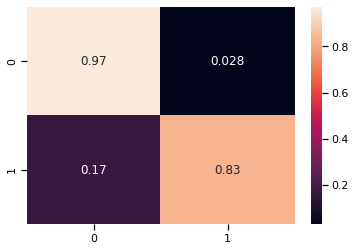

In [81]:
from sklearn.model_selection import *

#Logistic regression version with no preprocessing technique
#creating x variable with desired feature and Y variable with target variable
X = df.iloc[: ,1:-1 ].values
Y = df.iloc[: , -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
model = LogisticRegression()# or
model.fit(X_train, Y_train)

#fitting model with the x variable
y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

predict2 = model.predict(X_test)
#printing accuracy scores
crossvalscore = cross_val_score(model, X_test, Y_test, cv=5, scoring='accuracy')
print("test score Accuracy {:.2f}%".format(model.score(X_test, Y_test)*100))
print("train score Accuracy {:.2f}%".format(model.score(X_train, Y_train)*100))
print("Cross Validation Score: {:.2f}%".format(crossvalscore.mean()*100))

#printing confusion matrix
labels = ["not_smoking", "smoker"]
matrix = confusion_matrix(Y_test,Y_test_pred,normalize='true')


sns.heatmap(matrix, annot=True)
#printing classification report
print("Classifcation report")
print(classification_report(Y_test,Y_test_pred))



test score Accuracy 92.29%
train score Accuracy 89.21%
Cross Validation Score: 91.04%
Classifcation report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       318
           1       0.86      0.75      0.80        84

    accuracy                           0.92       402
   macro avg       0.90      0.86      0.88       402
weighted avg       0.92      0.92      0.92       402



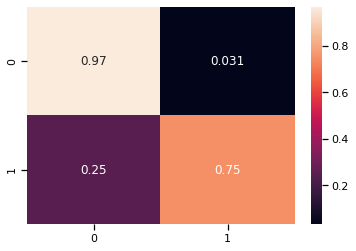

In [83]:
#Logistic regression version with standard scalar and feature scaling
X = df.drop(['age','region_southwest','region_northwest'], axis = 1).iloc[: ,1:-1 ].values
Y = df.iloc[: , -1].values
sc = StandardScaler().fit(X)
X_scaled = sc.transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = 0.3,random_state=0)
model = LogisticRegression()# or
model.fit(X_train, Y_train)

y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

predict2 = model.predict(X_test)
crossvalscore = cross_val_score(model, X_test, Y_test, cv=5, scoring='accuracy')
print("test score Accuracy {:.2f}%".format(model.score(X_test, Y_test)*100))
print("train score Accuracy {:.2f}%".format(model.score(X_train, Y_train)*100))
print("Cross Validation Score: {:.2f}%".format(crossvalscore.mean()*100))

#printing confusion matrix
labels = ["not_smoking", "smoker"]
matrix = confusion_matrix(Y_test,Y_test_pred,normalize='true')


sns.heatmap(matrix, annot=True)
#printing classification report
print("Classifcation report")
print(classification_report(Y_test,Y_test_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.88      0.87      0.87        84

    accuracy                           0.95       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.95      0.95      0.95       402

test score Accuracy 94.78%
train score Accuracy 100.00%
Classifcation report
Cross Validation Score: 92.78%


<AxesSubplot:>

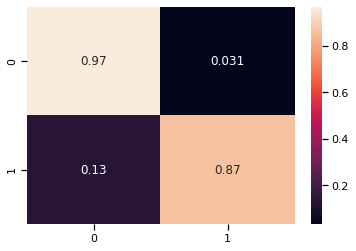

In [74]:
#random forest with no preprocessing
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[: ,1:-1 ].values
Y = df.iloc[: , -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)
print(classification_report(Y_test,Y_test_pred))
crossvalscore = cross_val_score(model, X_test, Y_test, cv=5, scoring='accuracy')


print("test score Accuracy {:.2f}%".format(rf_model.score(X_test, Y_test)*100))
print("train score Accuracy {:.2f}%".format(rf_model.score(X_train, Y_train)*100))
print("Classifcation report")
print("Cross Validation Score: {:.2f}%".format(crossvalscore.mean()*100))

matrix = confusion_matrix(Y_test,Y_test_pred,normalize='true')
sns.heatmap(matrix, annot=True)



              precision    recall  f1-score   support

           0       0.94      0.95      0.95       318
           1       0.81      0.77      0.79        84

    accuracy                           0.92       402
   macro avg       0.88      0.86      0.87       402
weighted avg       0.91      0.92      0.91       402

test score Accuracy 91.54%
train score Accuracy 100.00%
Classifcation report
Cross Validation Score: 91.55%


<AxesSubplot:>

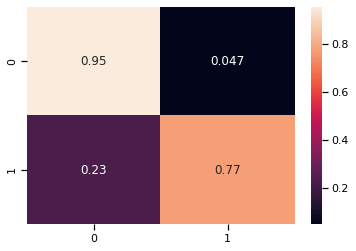

In [78]:
#random forest with  preprocessing

from sklearn.ensemble import RandomForestClassifier
X = df.drop(['age','region_southwest','region_southwest'], axis = 1).iloc[: ,1:-1 ].values
Y = df.iloc[: , -1].values

sc = StandardScaler().fit(X)
X_scaled = sc.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = 0.3,random_state=0)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)
print(classification_report(Y_test,Y_test_pred))
crossvalscore = cross_val_score(model, X_test, Y_test, cv=5, scoring='accuracy')


print("test score Accuracy {:.2f}%".format(rf_model.score(X_test, Y_test)*100))
print("train score Accuracy {:.2f}%".format(rf_model.score(X_train, Y_train)*100))
print("Classifcation report")
print("Cross Validation Score: {:.2f}%".format(crossvalscore.mean()*100))

matrix = confusion_matrix(Y_test,Y_test_pred,normalize='true')
sns.heatmap(matrix, annot=True)